

# Visualizing Academic Performance Data with Plotnine

## Objective: Use the Plotnine library to analyze and visualize a dataset containing student demographic and academic performance information.

* Load the Data: Import a dataset (student_performance.csv) into a pandas DataFrame.
* Create a line plot to display how average scores vary across different levels of parental_level_of_education. Include appropriate labels for clarity.
* Generate a bar plot to compare the average scores of male and female students. Use color to differentiate genders in the plot.
* Use a scatter plot to visualize the relationship between math_score and reading_score. Add a regression line for better insight into the correlation.
* Create a histogram to display the distribution of average_score. Overlay a KDE plot on the histogram for a smoother representation.



In [13]:
import pandas as pd
from plotnine import *
import numpy as np

# Load the dataset
df = pd.read_csv('/content/Cleaned_Students_Performance.csv')
display(df)

# Calculate average score
df['average_score'] = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,1,1,88,99,95,282,94.000000
996,1,group C,high school,0,0,62,55,55,172,57.333333
997,0,group C,high school,0,1,59,71,65,195,65.000000
998,0,group D,some college,1,1,68,78,77,223,74.333333


## Visualizing Average Scores by Parental Education
Let's create a line plot to show how average scores vary across different levels of parental education:

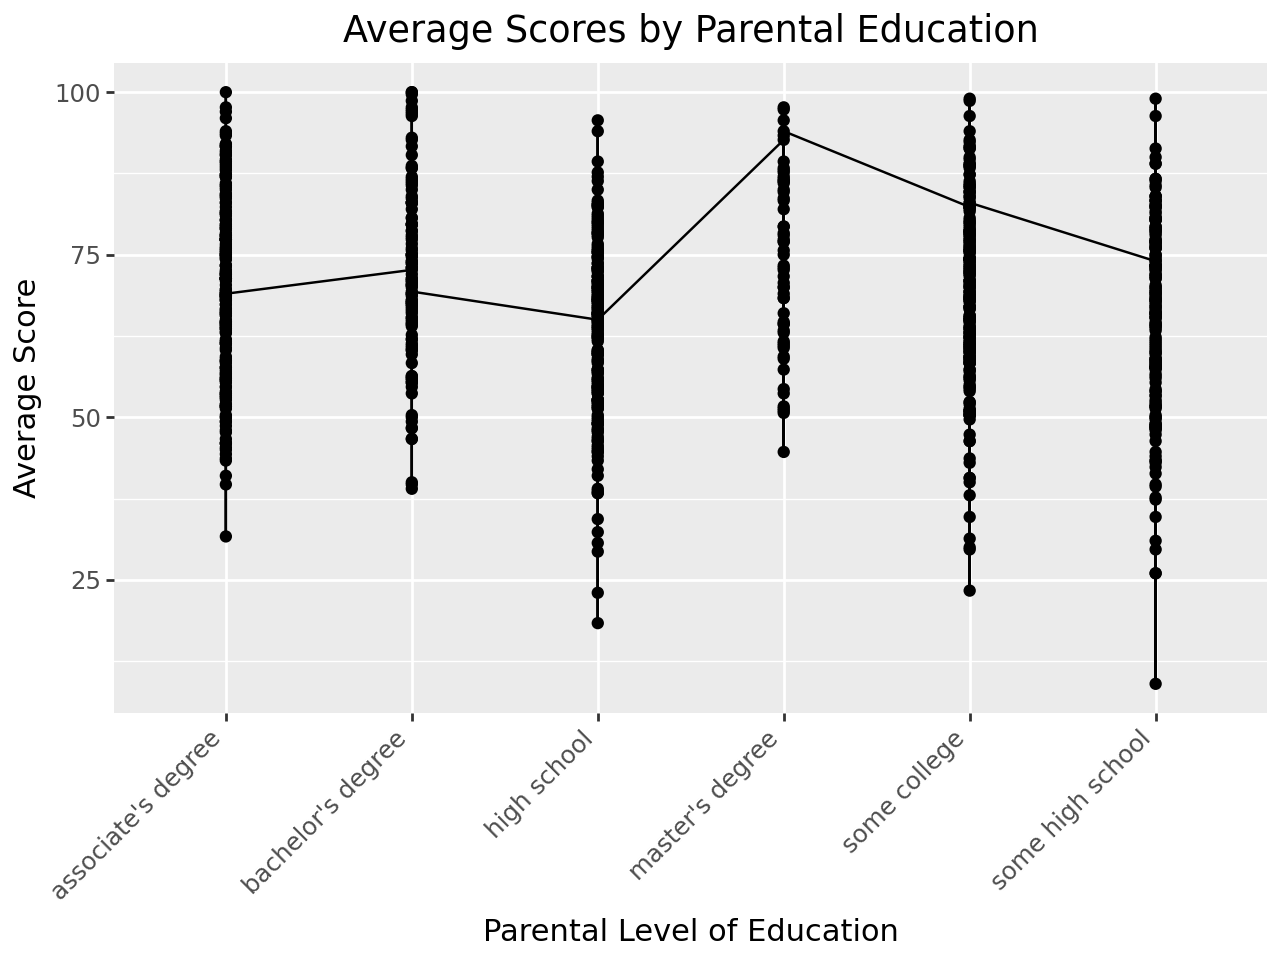

In [2]:
(ggplot(df, aes(x='parental_level_of_education', y='average_score', group=1))
 + geom_line()
 + geom_point()
 + labs(x='Parental Level of Education', y='Average Score', title='Average Scores by Parental Education')
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
)


## Comparing Average Scores by Gender
Now, let's create a bar plot to compare average scores between male and female students:

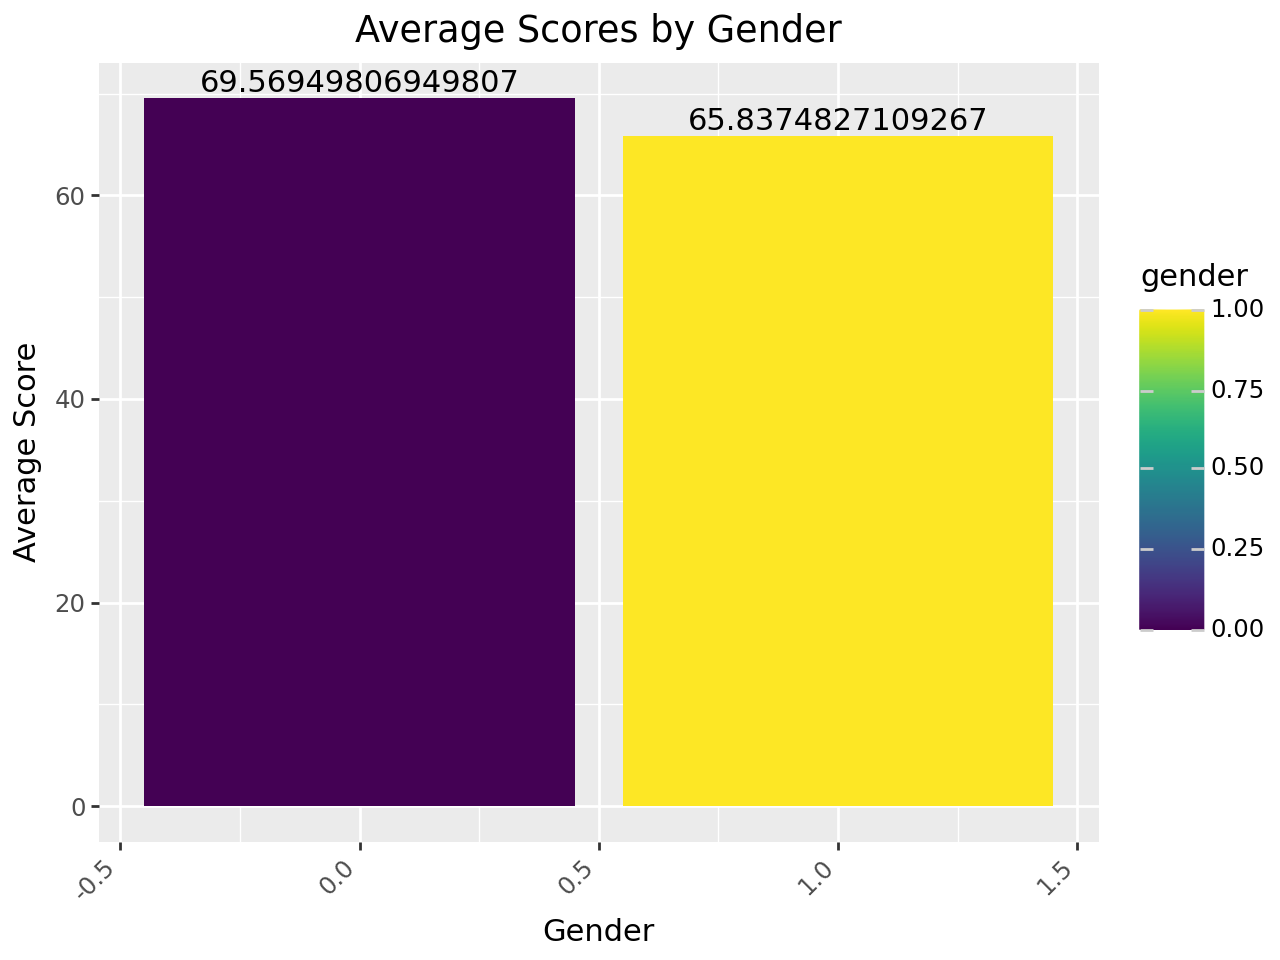

In [22]:
# Calculate average score per gender
avg_scores = df.groupby('gender')['average_score'].mean().reset_index()

# Create the plot
(ggplot(avg_scores, aes(x='gender', y='average_score', fill='gender'))
 + geom_col()  # Use geom_col to plot pre-calculated averages
 + geom_text(aes(label='average_score'),  # Label with the average score
             position=position_dodge(width=0.9), va='bottom')
 + labs(x='Gender', y='Average Score', title='Average Scores by Gender')
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

## Relationship between Math and Reading Scores
To visualize the relationship between math and reading scores, we'll use a scatter plot with a regression line:

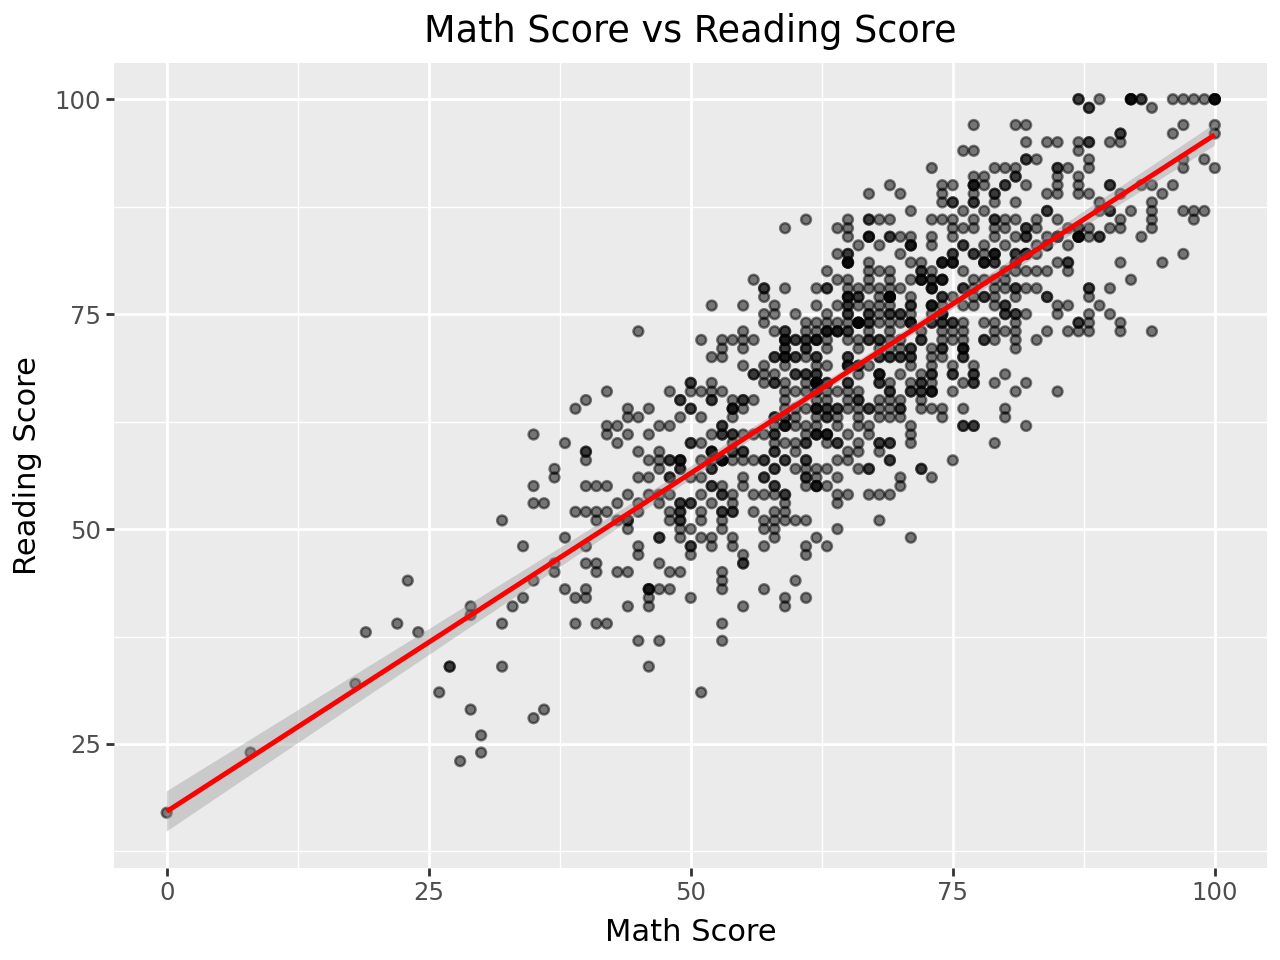

In [6]:
(ggplot(df, aes(x='math_score', y='reading_score'))
 + geom_point(alpha=0.5)
 + geom_smooth(method='lm', color='red')
 + labs(x='Math Score', y='Reading Score', title='Math Score vs Reading Score')
)


## Distribution of Average Scores
Finally, let's create a histogram with an overlaid KDE plot to show the distribution of average scores:

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 24'. Pick better value with 'binwidth'.


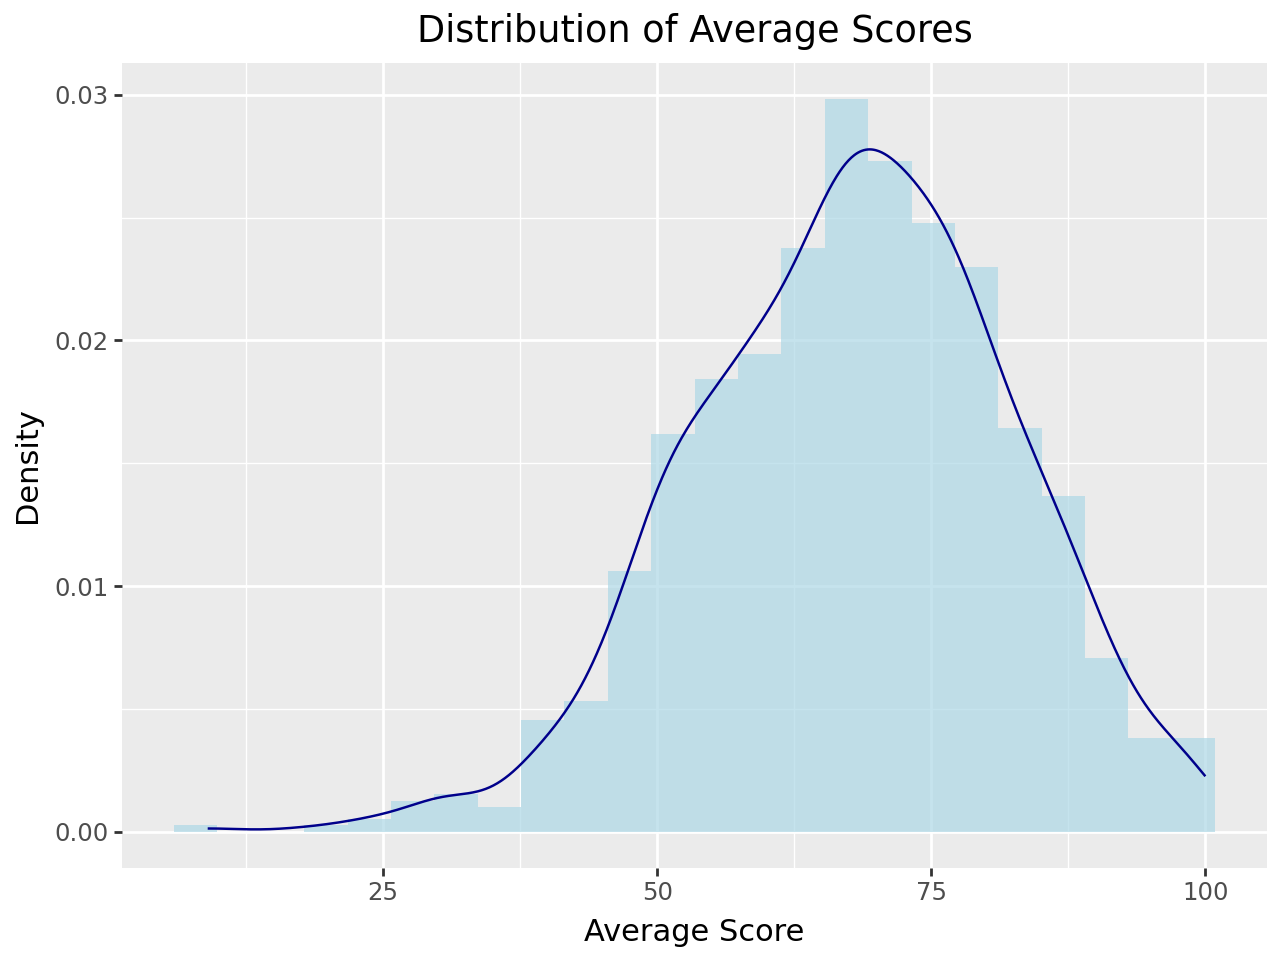

In [7]:
(ggplot(df, aes(x='average_score'))
 + geom_histogram(aes(y='..density..'), fill='lightblue', alpha=0.7)
 + geom_density(color='darkblue')
 + labs(x='Average Score', y='Density', title='Distribution of Average Scores')
)
